### Event Distribution of Mice with Time

In [1]:
import pandas as pd
import direction_transition as dit
import paths
from preprocessing import read_csv_clean

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/ctrl/B5M1.CSV


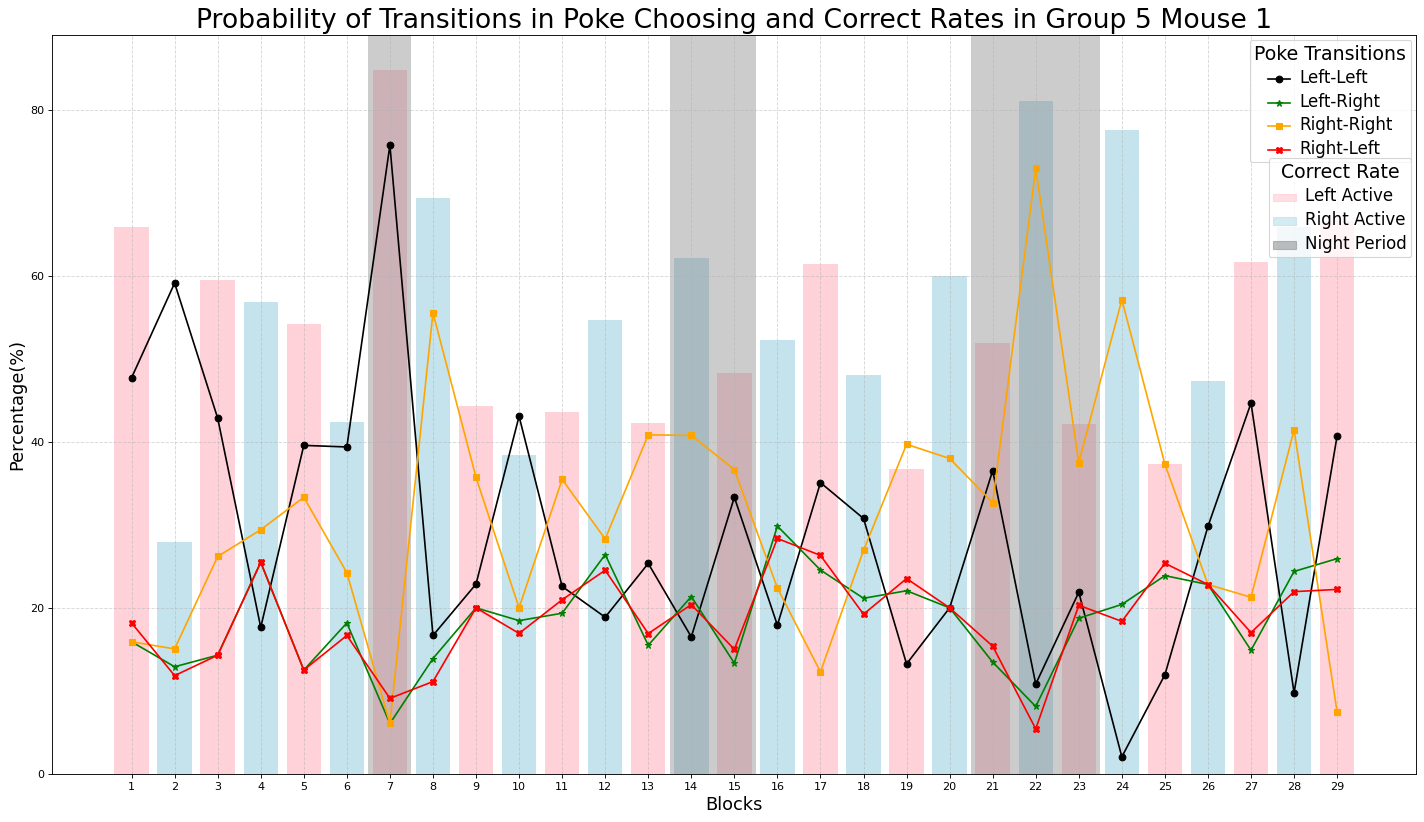

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/ctrl/B5M2.CSV


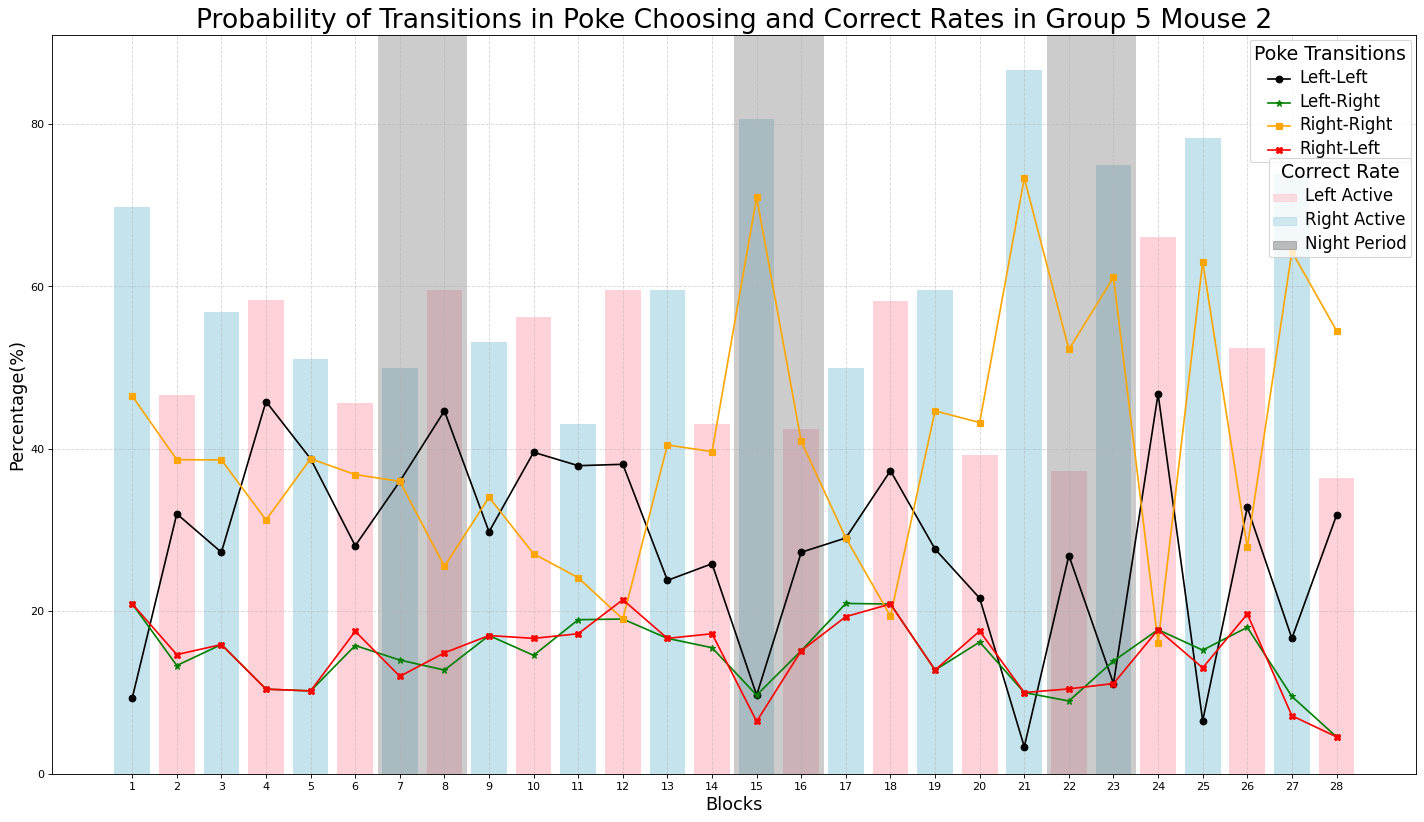

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/ctrl/B5M3.CSV


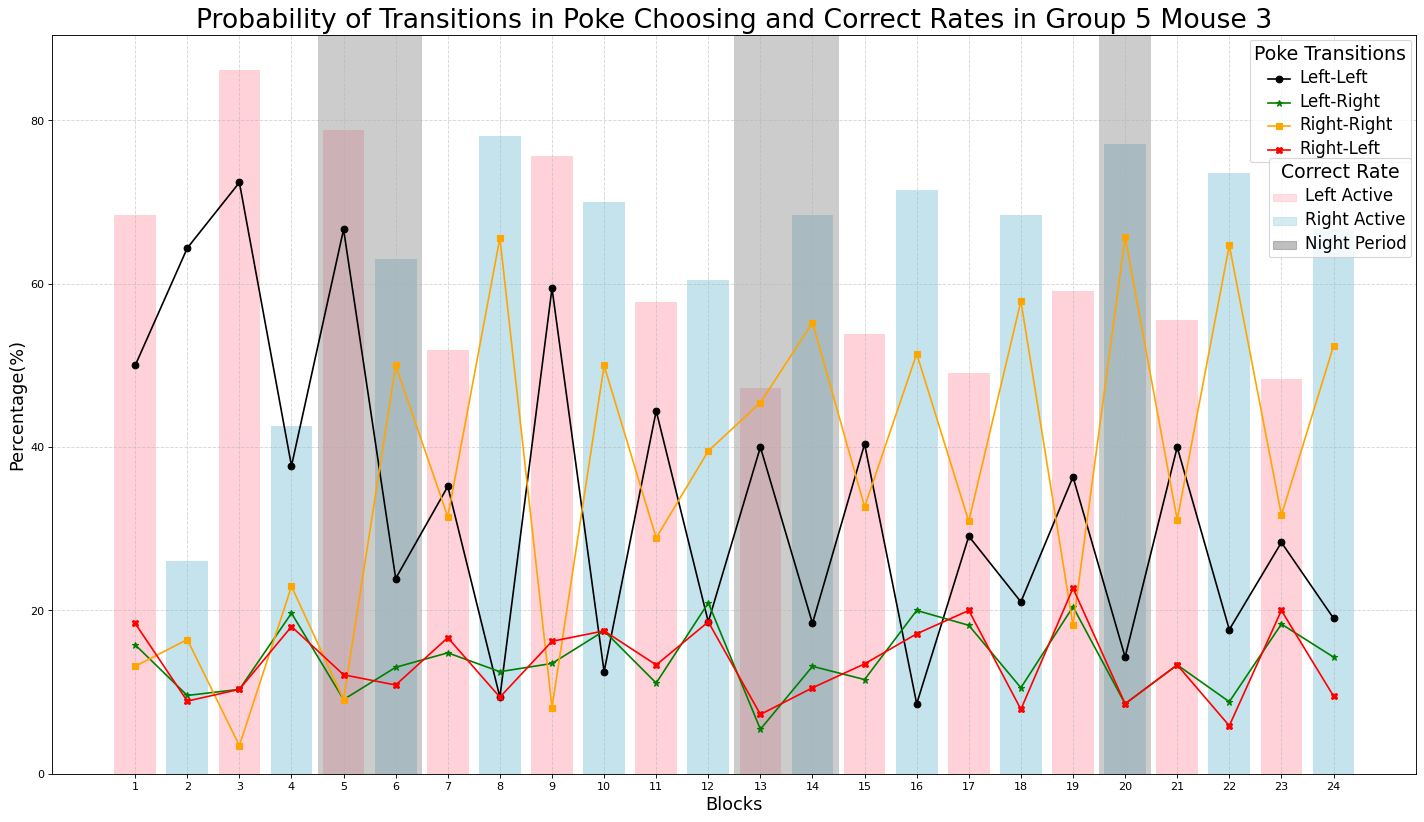

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/ctrl/B5M4.CSV


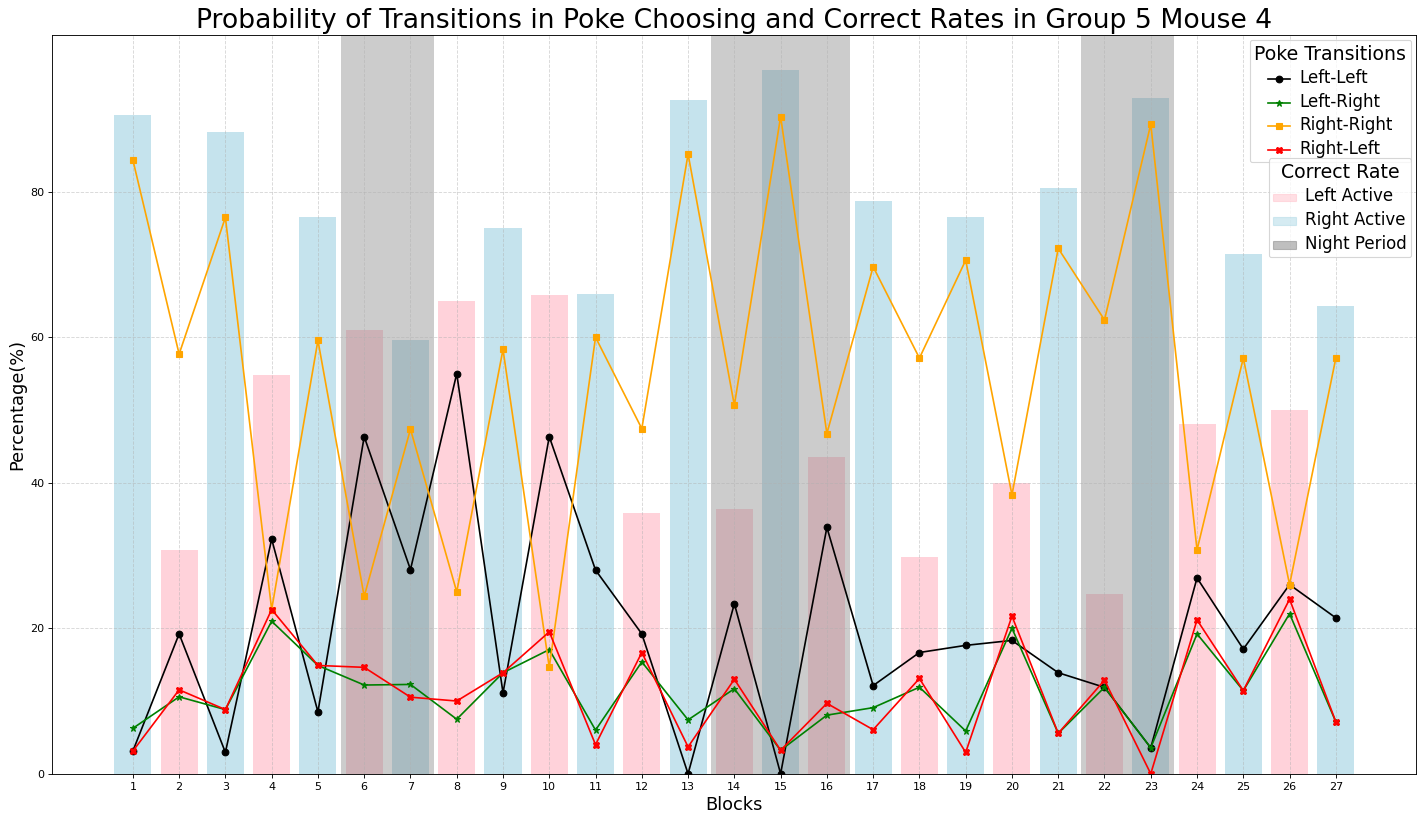

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/ctrl/B7M2.CSV


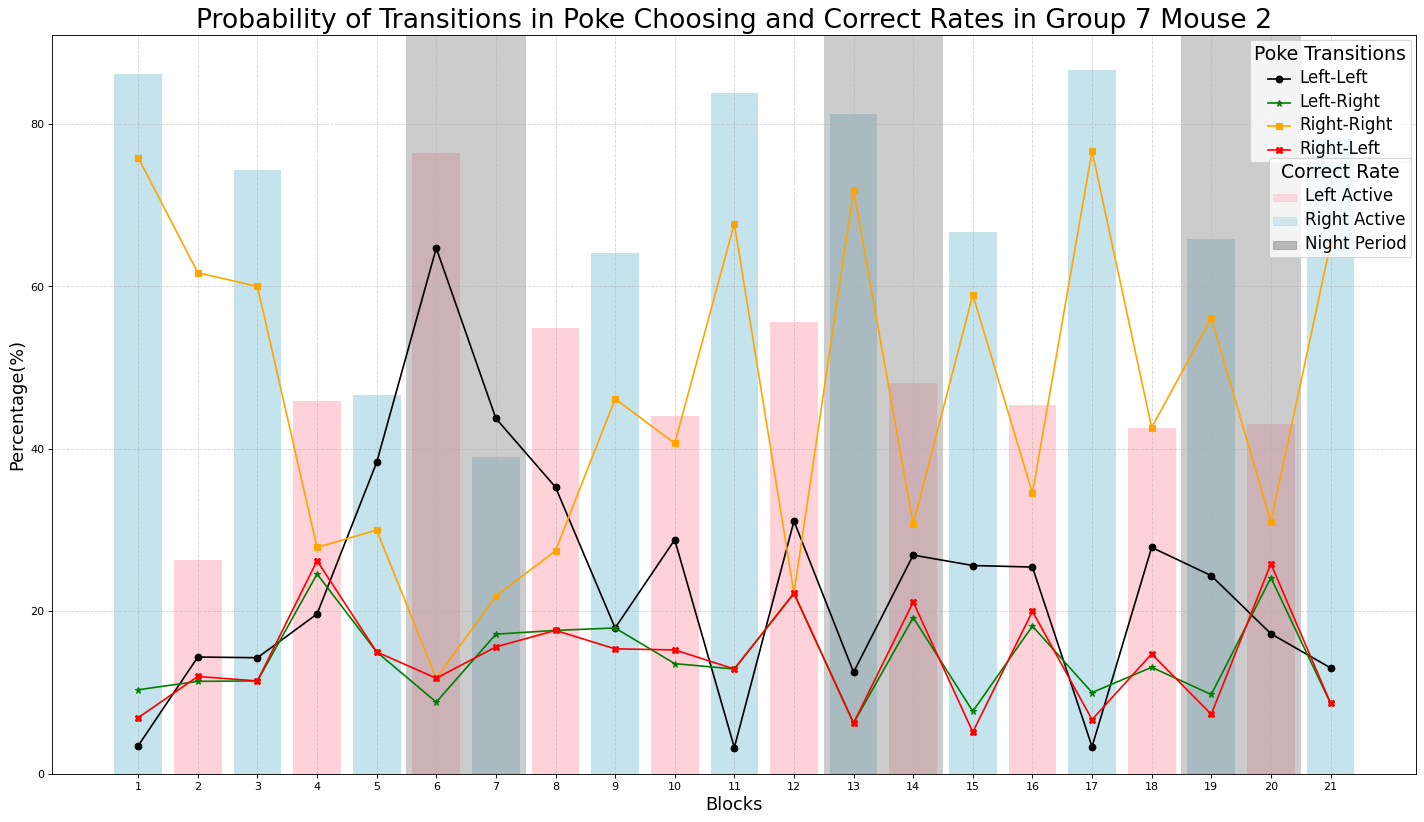

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/ctrl/B7M4.CSV


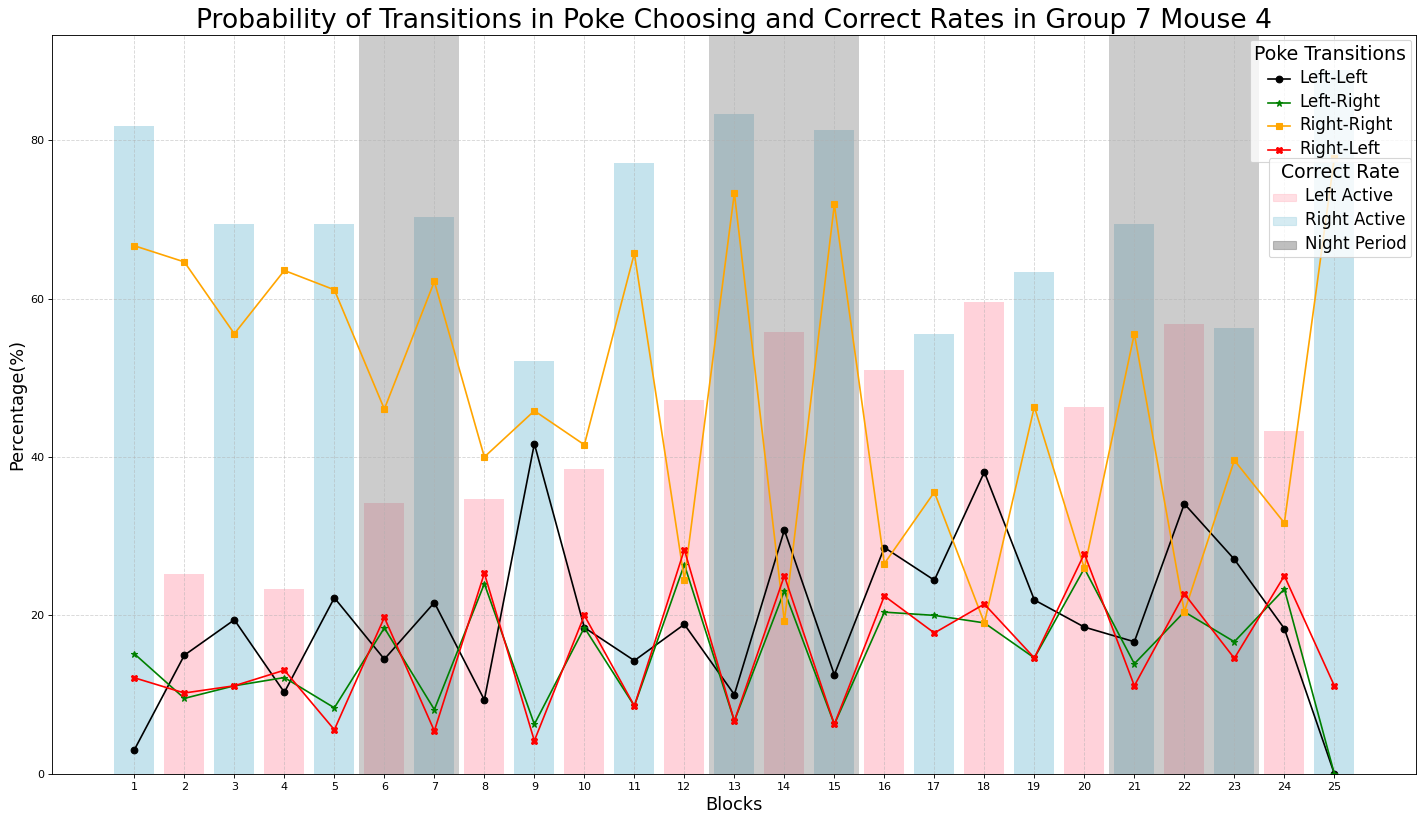

In [3]:
ctrl_scores = []

for path in paths.contigency_flip_ctrl:
    print(path)
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path, True)
    diff, left_start = dit.get_difference_key(data_stats)
    ctrl_scores.append(dit.learning_score_grad(diff, left_start))

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B10M1.CSV


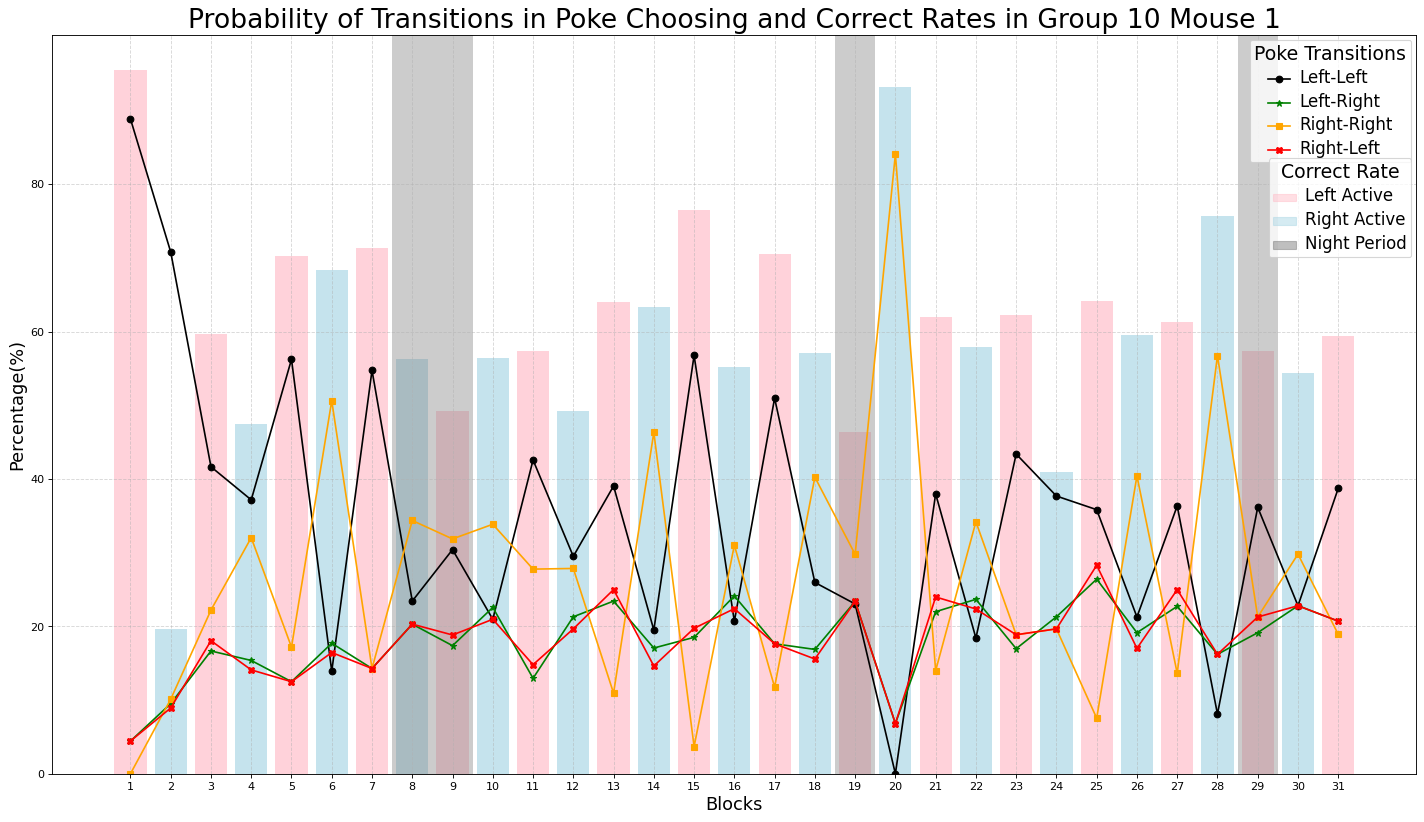

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B10M2.CSV


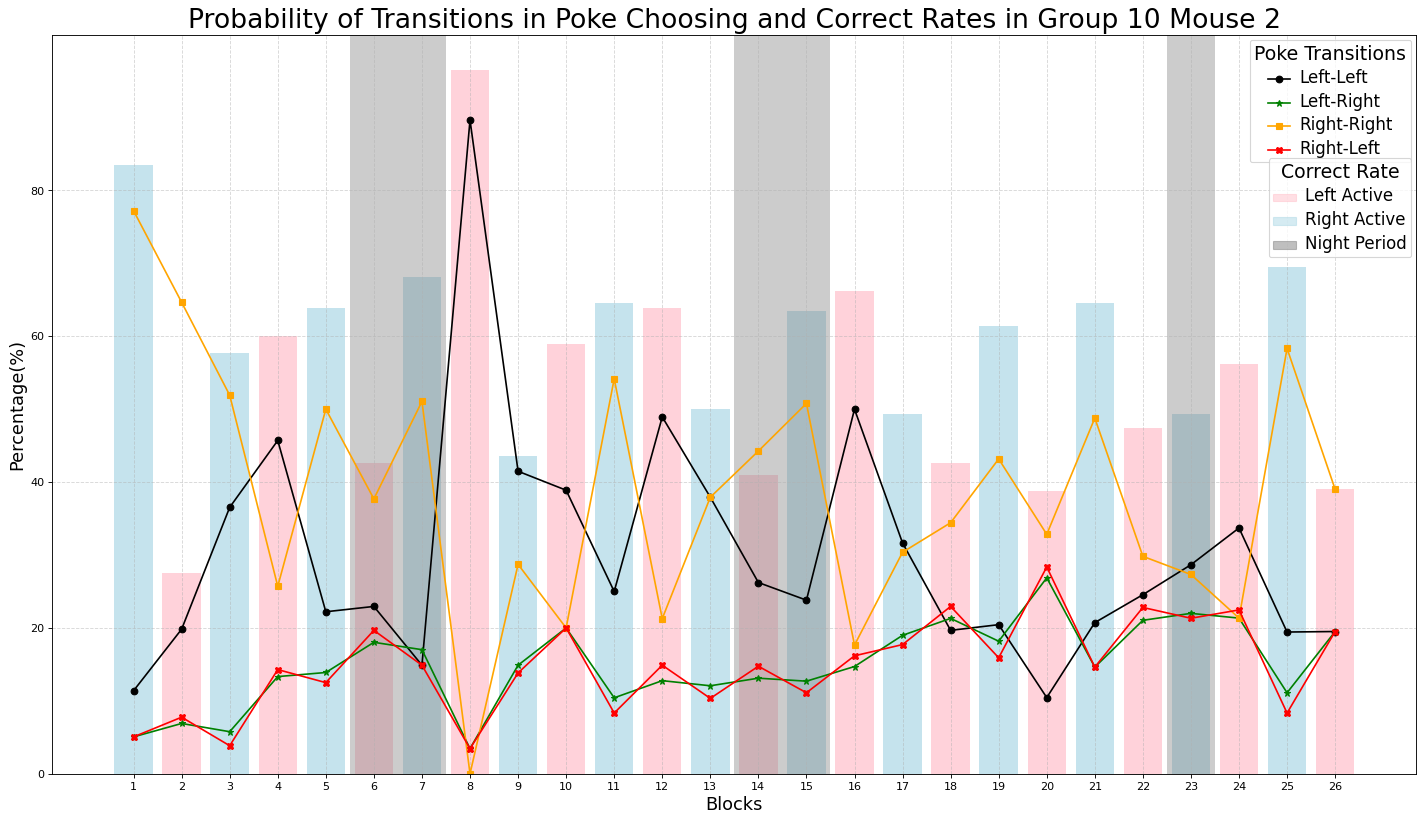

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B10M3.CSV


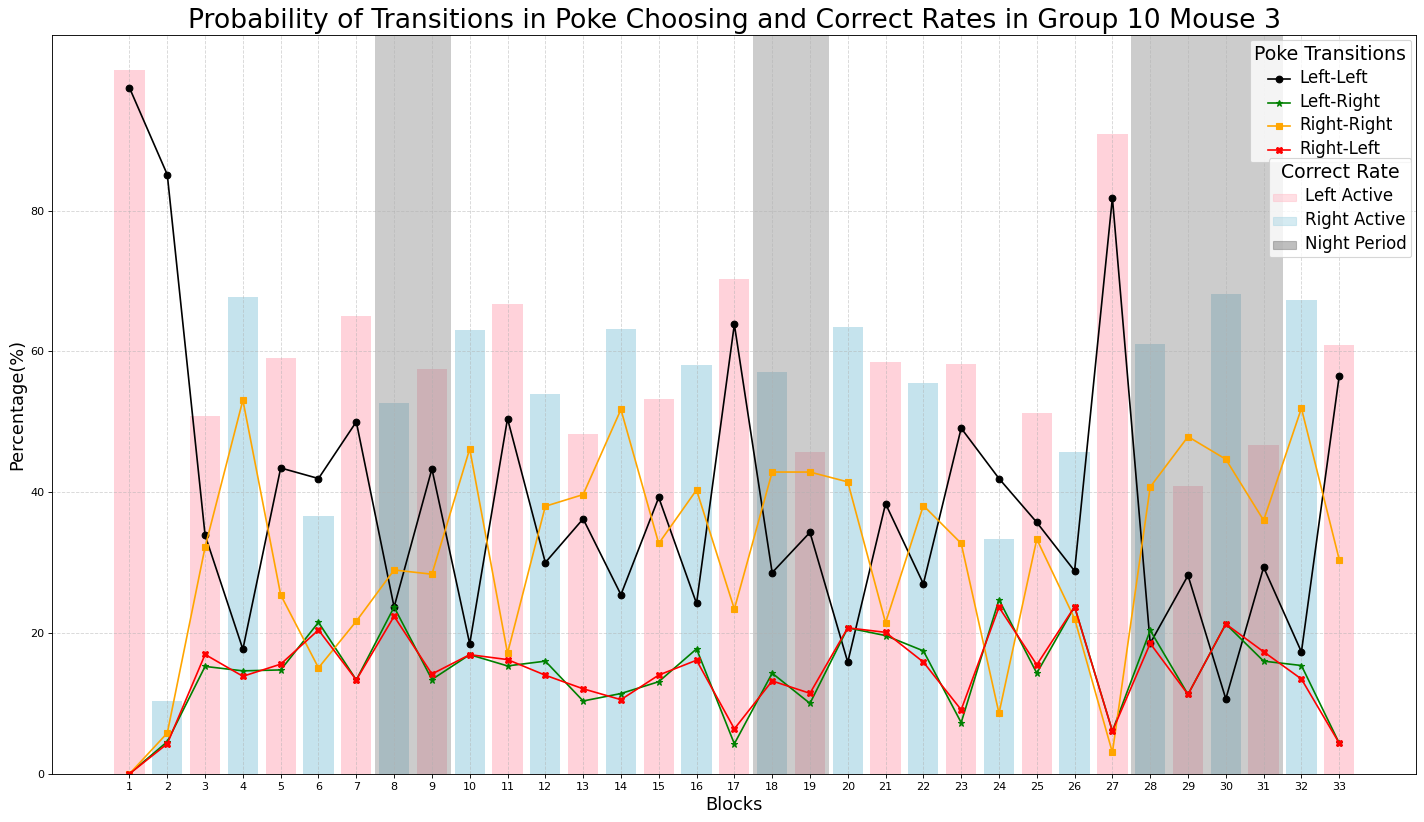

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B10M4.CSV


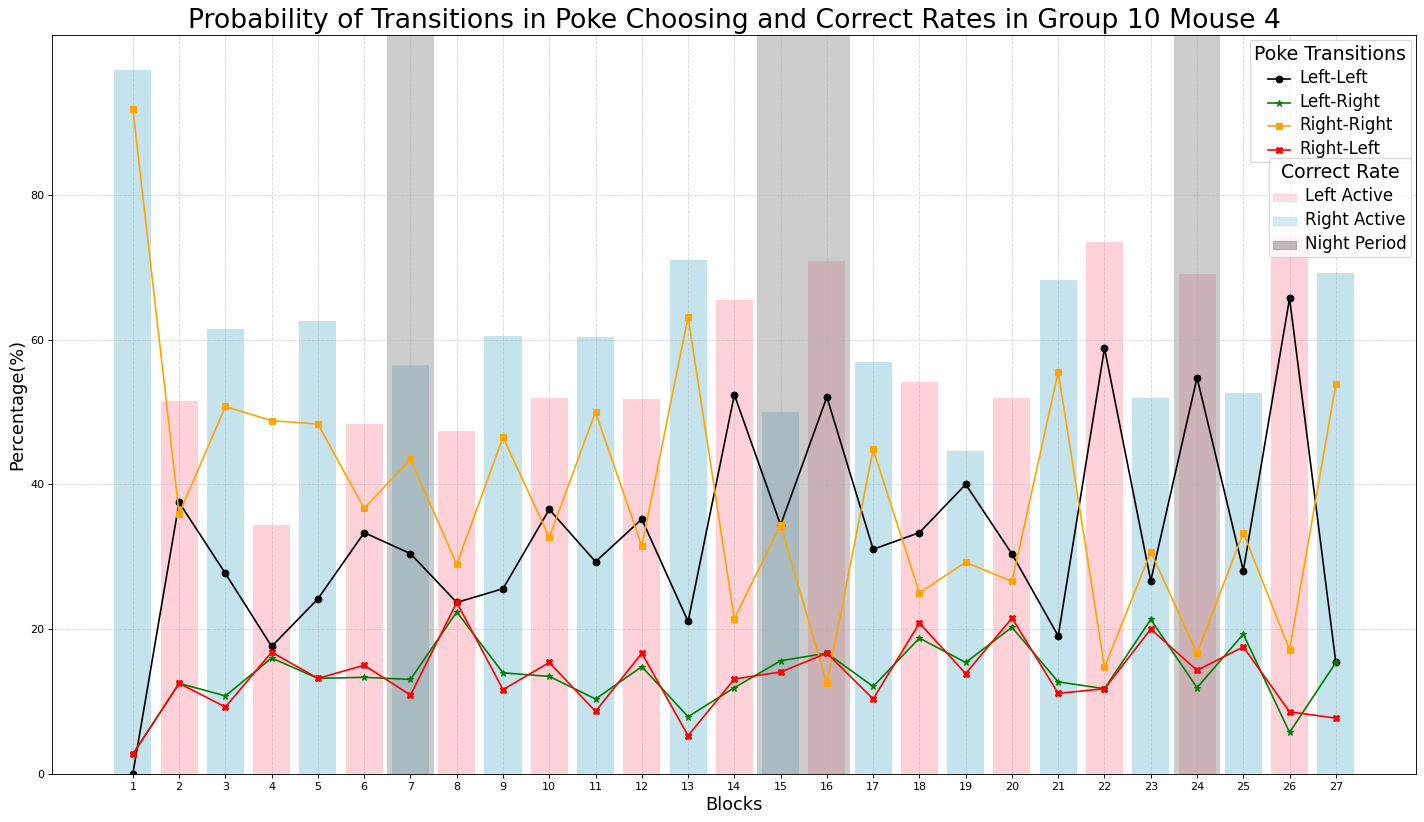

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B10M5.CSV


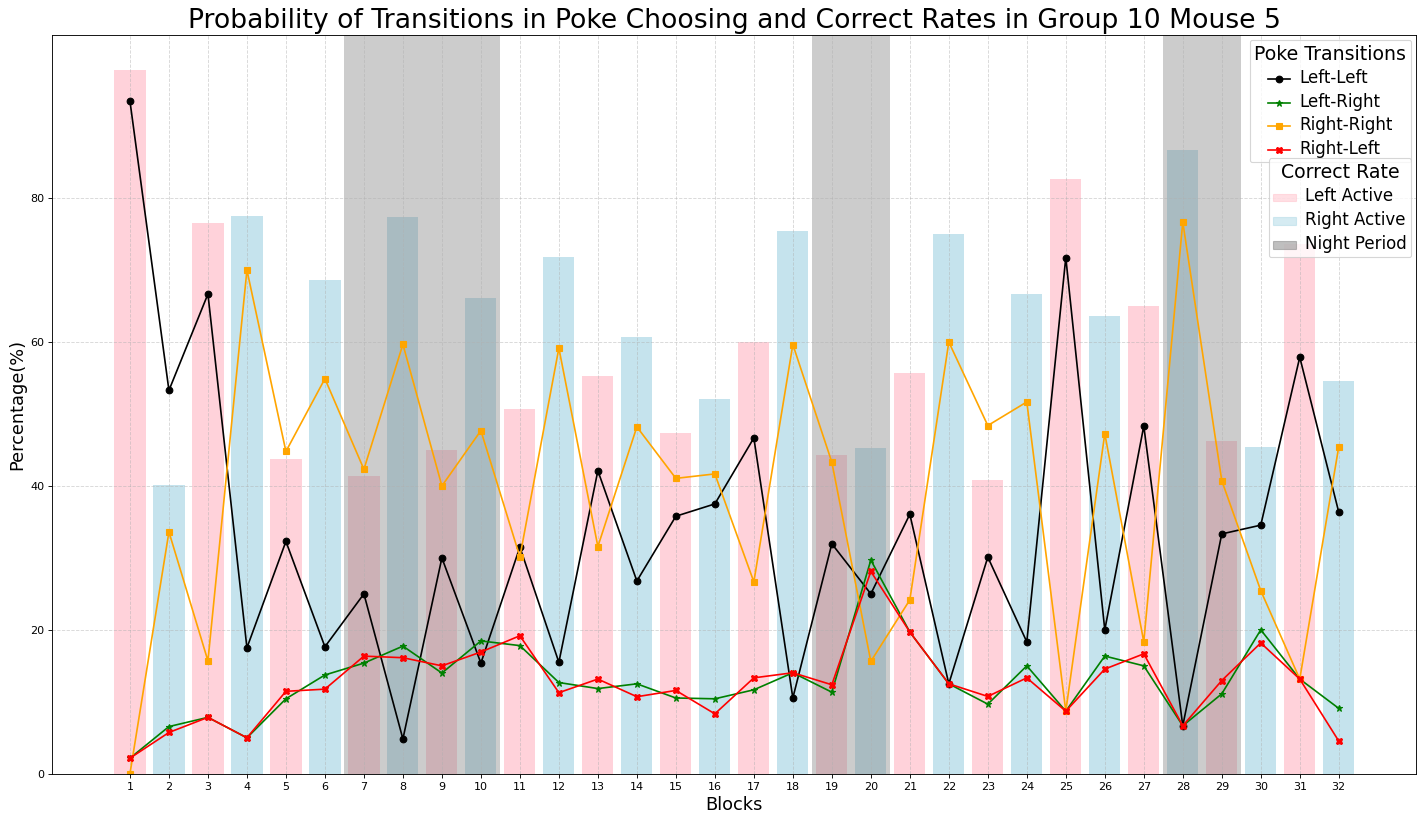

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B6M1.CSV


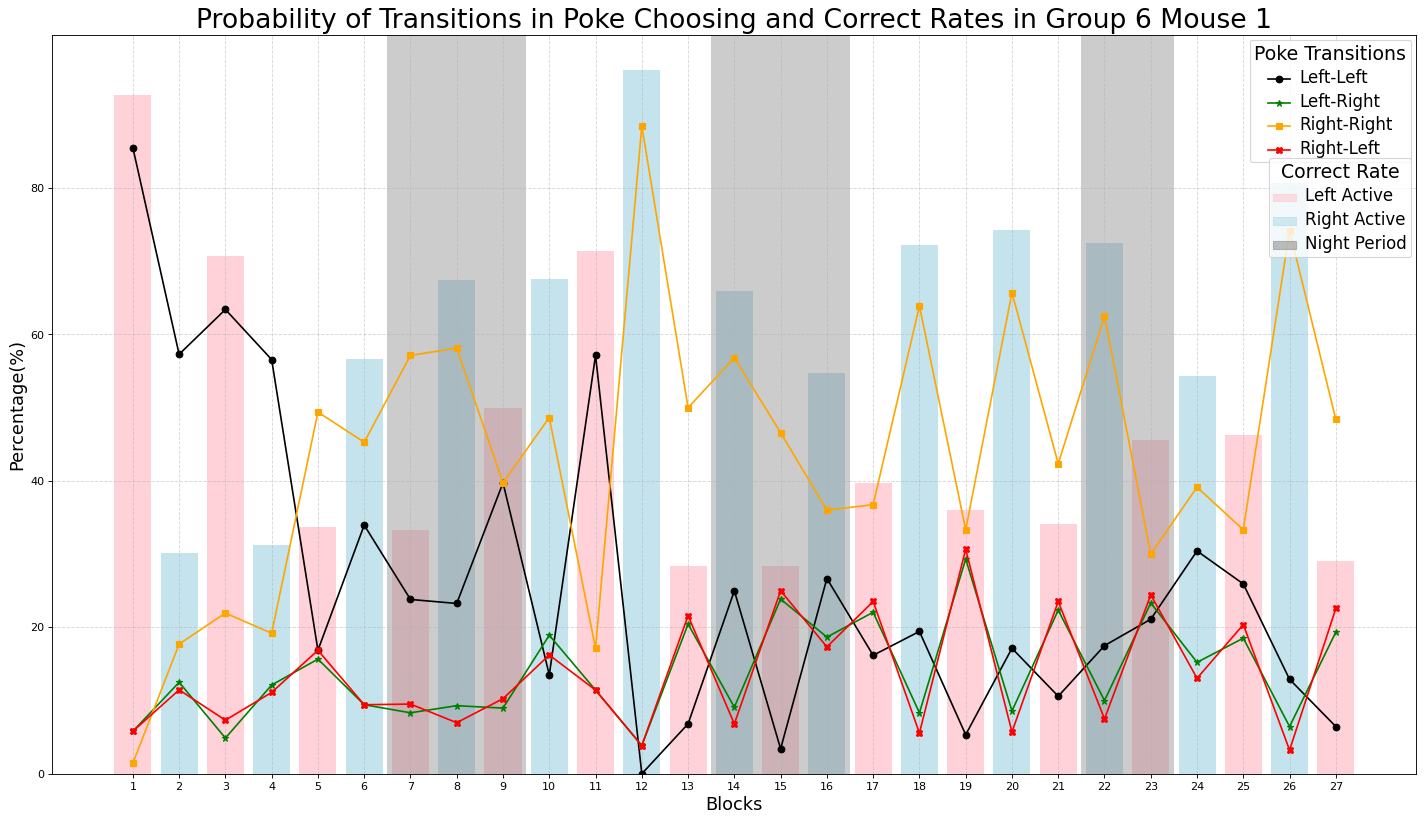

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B6M2.CSV


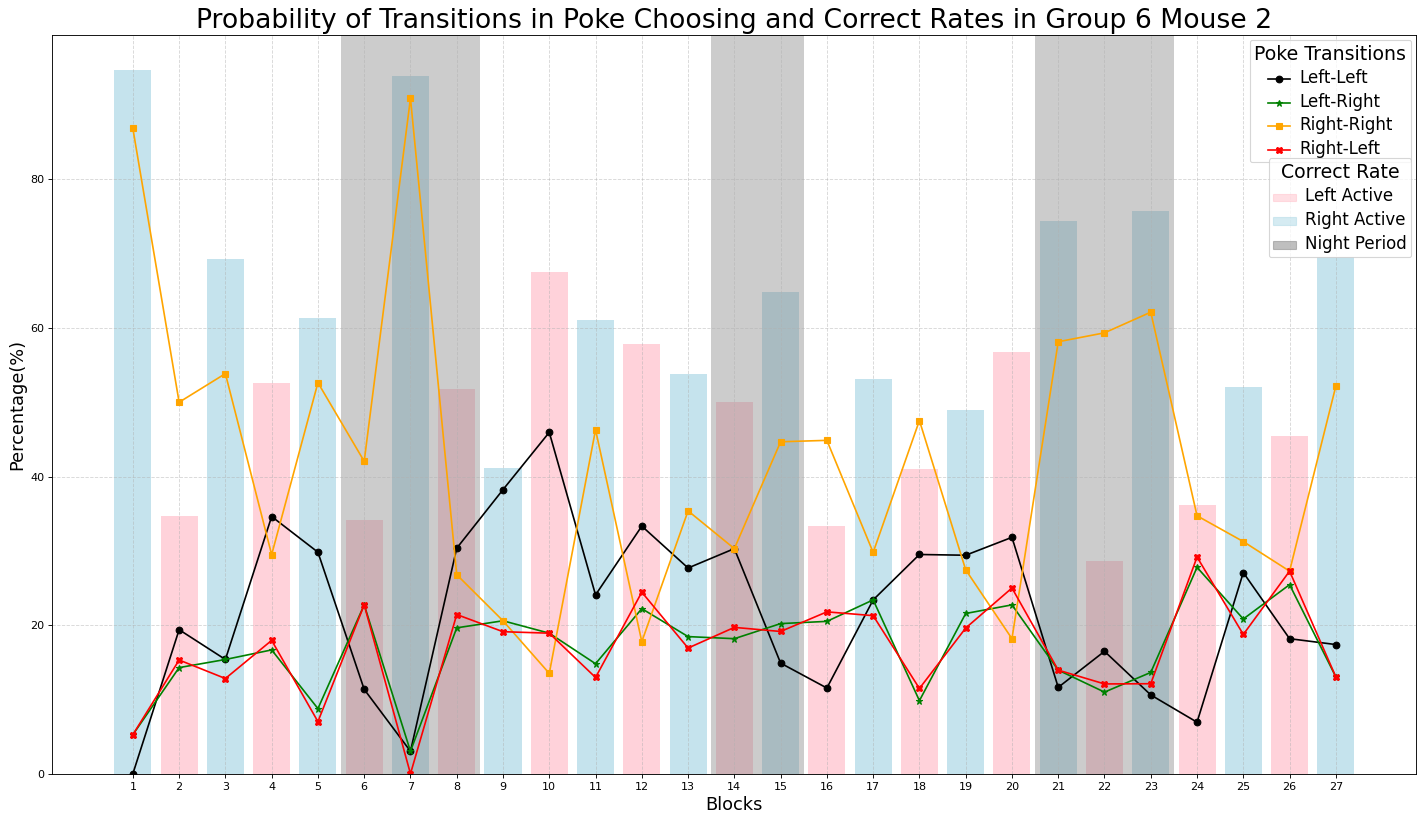

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B6M3.CSV


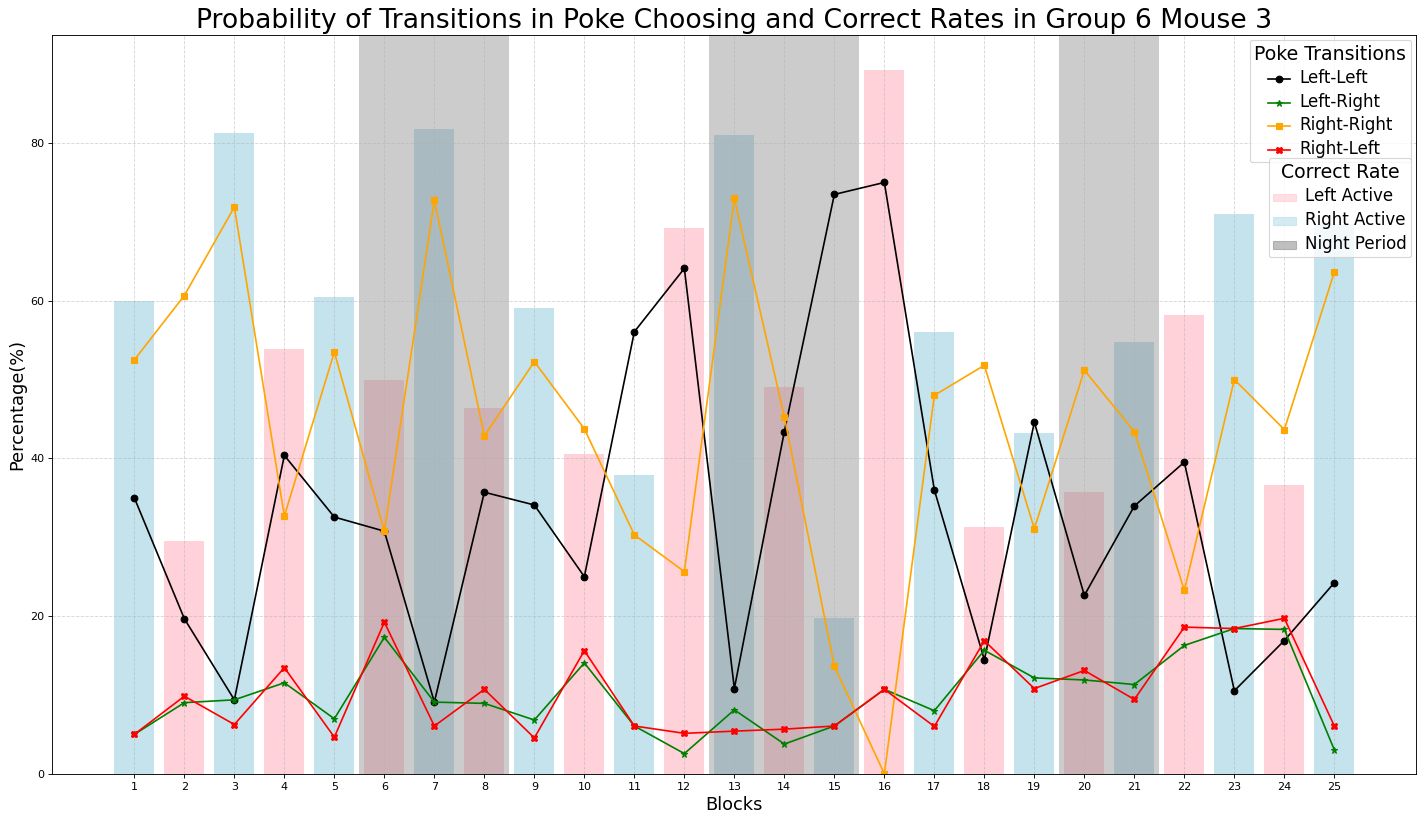

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B6M4.CSV


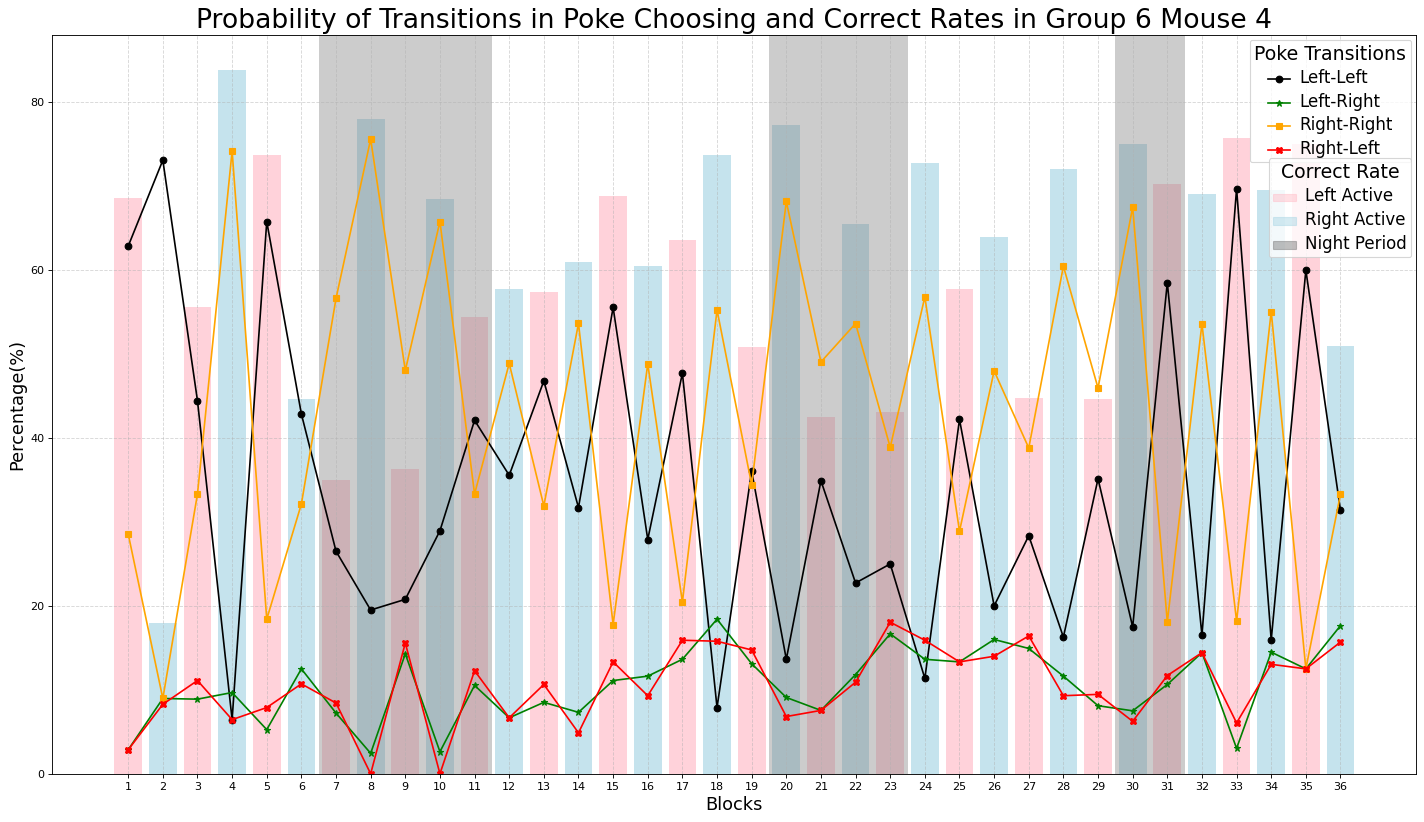

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B8M1.CSV


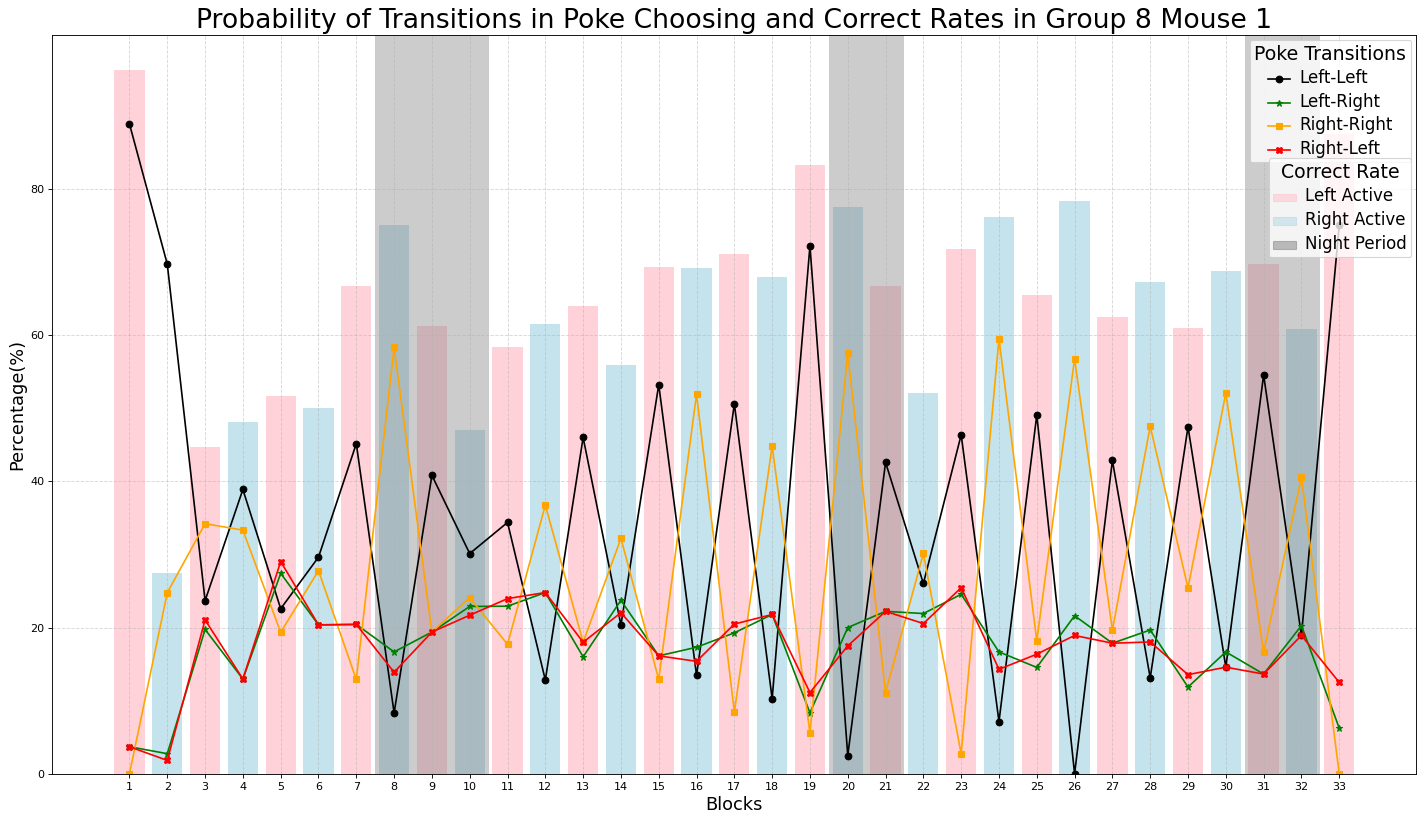

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B8M2.CSV


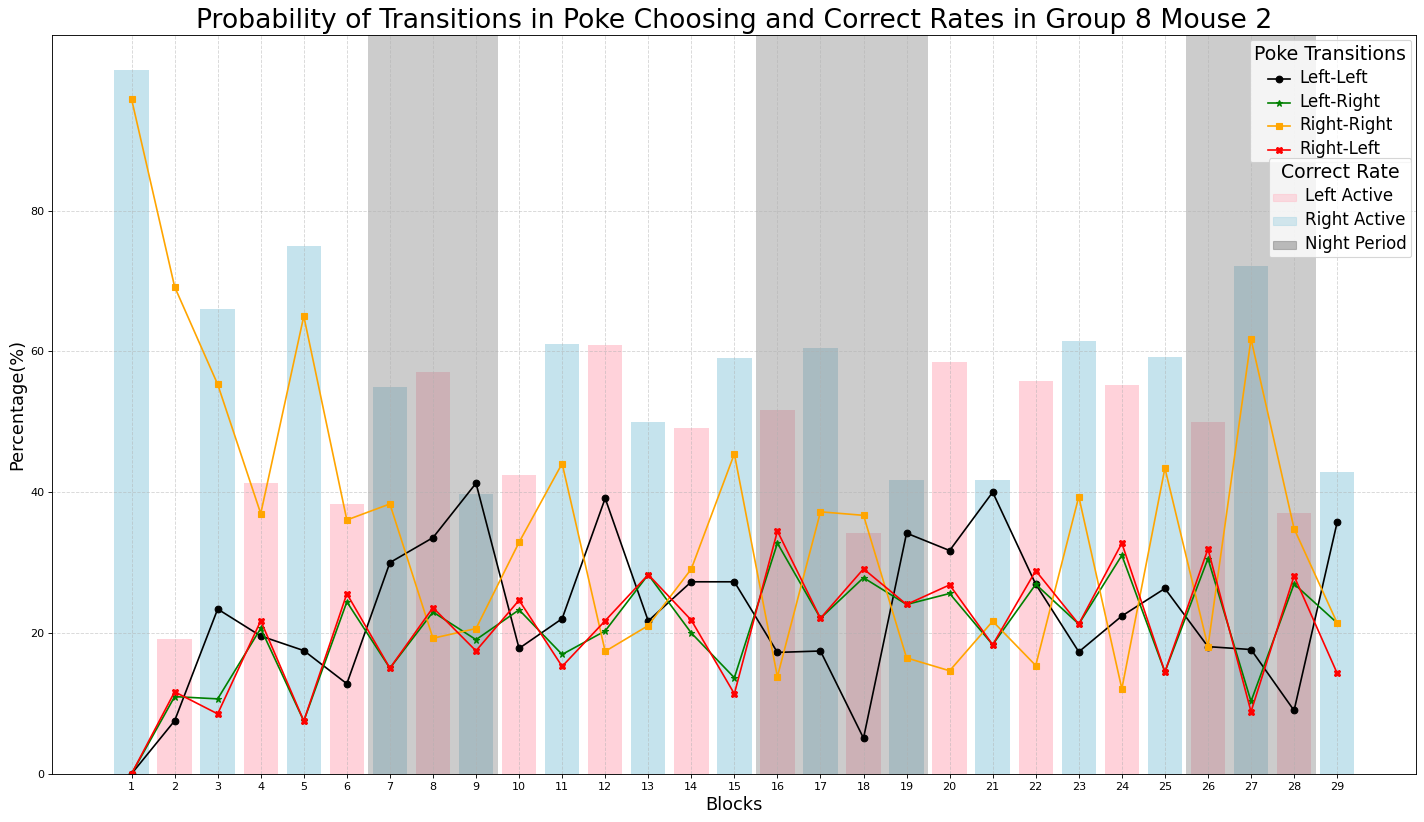

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B8M3.CSV


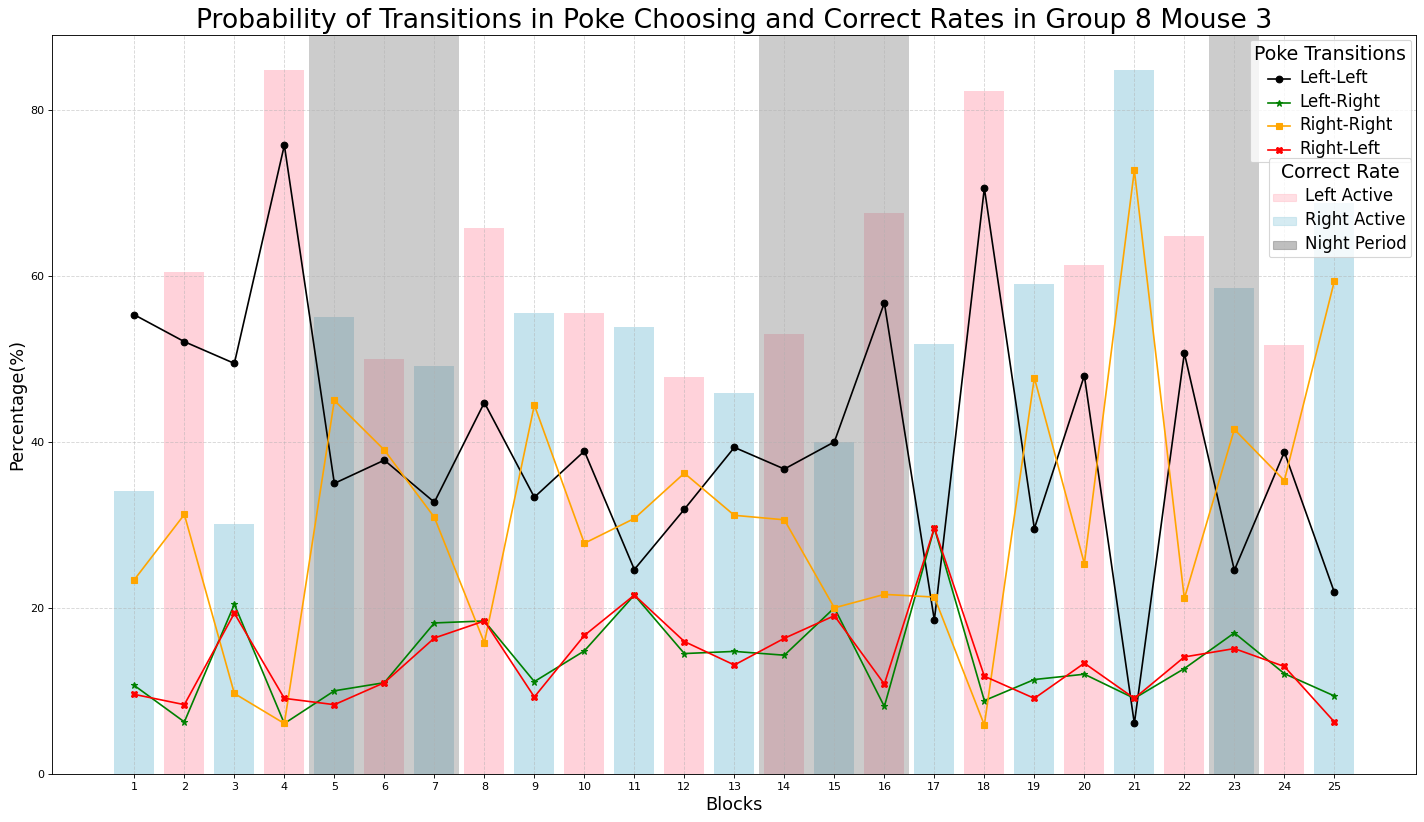

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B9M1.CSV


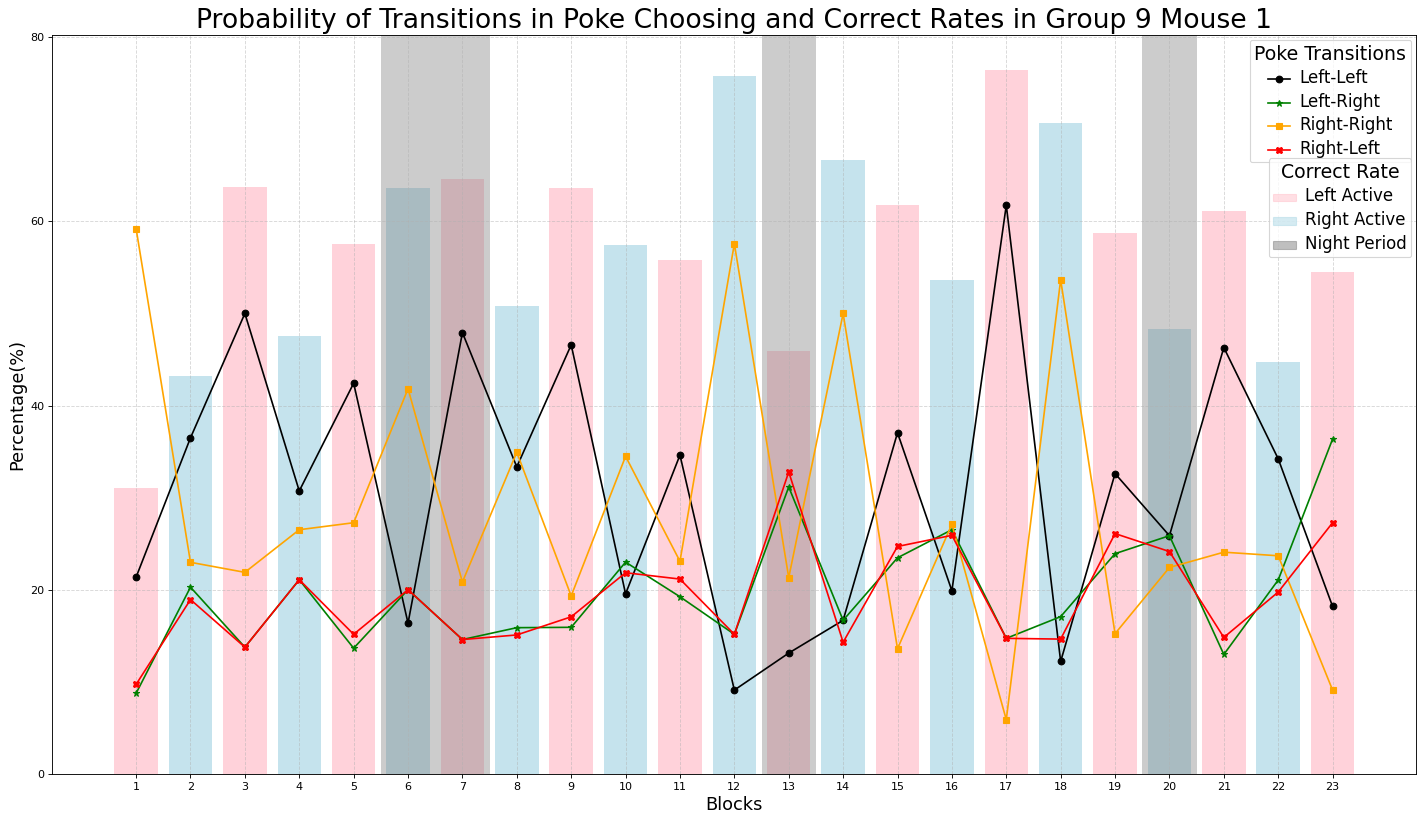

/home/ftlab/Desktop/For_Andy/behavior data integrated/CASK/reversal/cask/B9M2.CSV


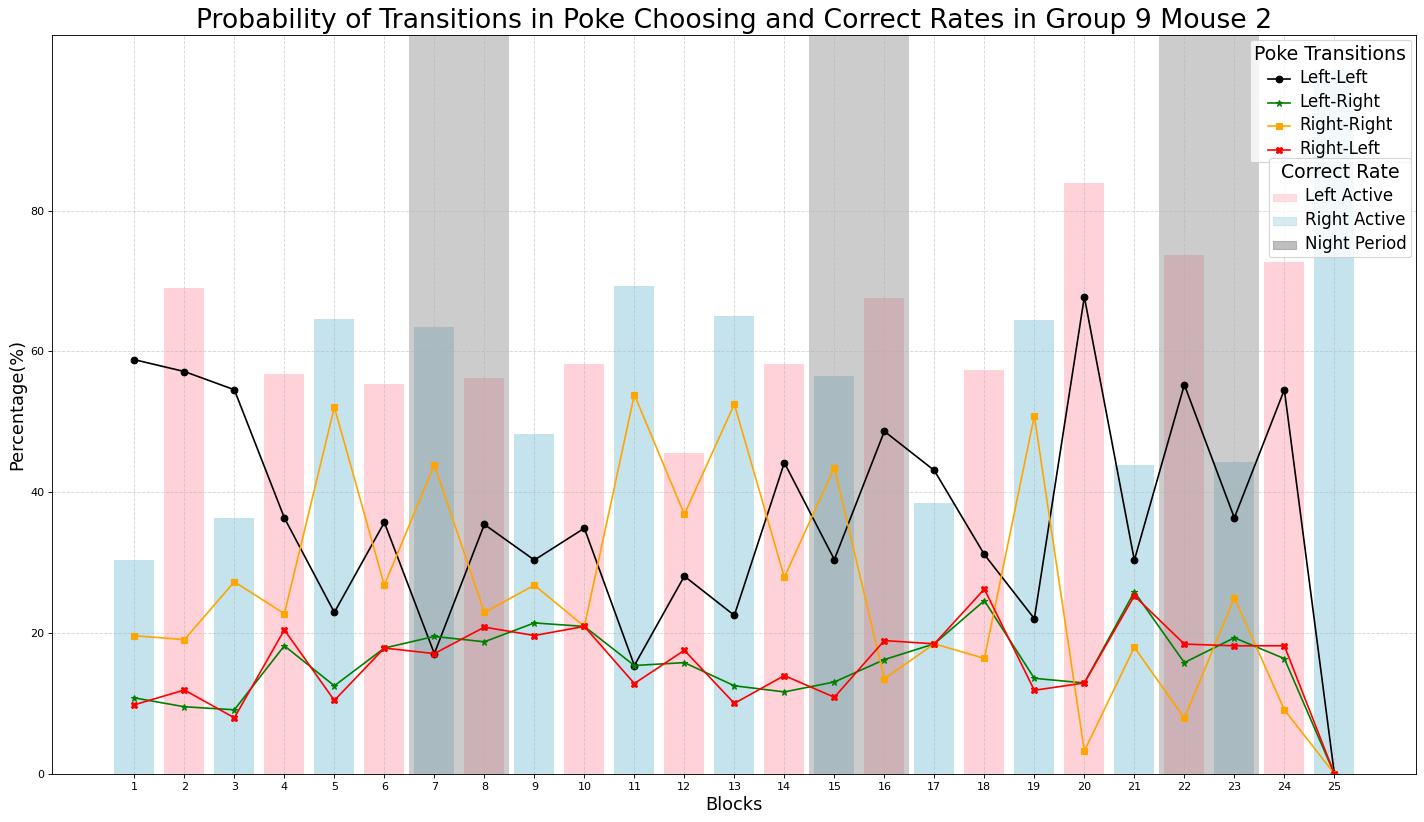

In [6]:
cask_scores = []

for path in paths.contigency_flip_cask:
    print(path)
    data_dropped = read_csv_clean(path=path)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path, group=True)
    diff, left_start = dit.get_difference_key(data_stats)
    cask_scores.append(dit.learning_score_grad(diff, left_start))

In [7]:
print(ctrl_scores)
print(cask_scores)

[451.65, 714.14, 1098.9499999999998, 1246.7100000000003, 658.17, 566.0999999999999]
[1192.03, 627.66, 790.8900000000001, 881.5000000000001, 1273.93, 391.3399999999999, 473.17999999999995, 387.25999999999993, 1463.6500000000005, 1747.21, 232.3699999999999, 703.1, 692.6700000000001, 738.75]


In [13]:
import intervals as invs

In [12]:
import numpy as np

print(np.mean(ctrl_scores), np.std(ctrl_scores))
print(np.mean(cask_scores), np.std(cask_scores))

789.2866666666665 286.29148739624725
828.2528571428572 425.29147894504706


In [16]:
invs.MannWhitneyUTest(ctrl_scores, cask_scores, test_side='greater')

P Value is  0.45219298245614037
There is no significant difference between the two groups.


* In flipping poke case, we find that there is left or right stage (mice display a tendency to stick to one direction)
* there is only one stage at a time, and transition can take some times (1-2 stage to move to another)
* Generally, the accuracy is improved (>50~60% at the end and higher than the beginning)